In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.26/10


In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)


 Status      = 0 
 Chi2/nDoF   = 55.339153261777184/52 
 Probability = 0.3498358993865222  
 ( -6798.06 +- 9188.82 )  
 ( 3.02989 +- 4.8245 )  
 ( -0.00030658 +- 0.000633122 ) 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      55.3392
NDf                       =           52
p0                        =     -6798.06   +/-   9188.82     
p1                        =      3.02989   +/-   4.8245      
p2                        =  -0.00030658   +/-   0.000633122 


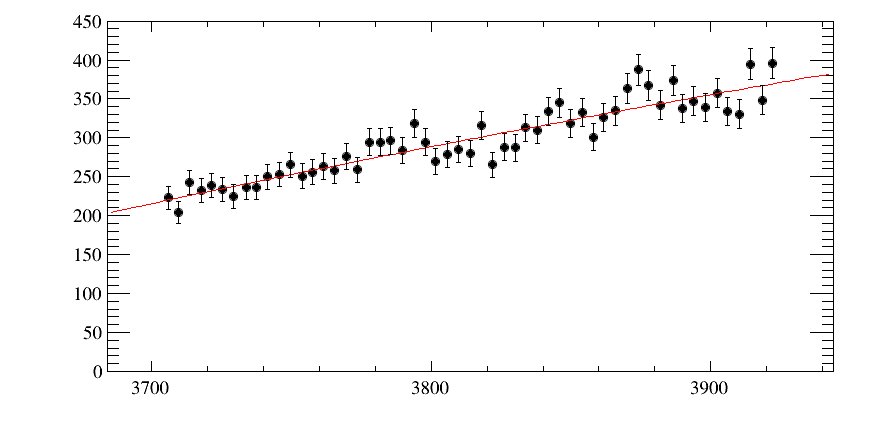

In [3]:
x=[]; y=[]
with open("data.txt") as fl:
    for line in fl:
        w = line[:-1].split(" ")
        x.append( VE( float(w[0]), 0           ) )
        y.append( VE( float(w[1]), float(w[1]) ) )
gr = makeGraph(x,y)
gr.SetMarkerStyle(20)
gr.GetYaxis().SetRangeUser(0,450)
gr.Draw("AP")
r = gr.Fit("pol2","S")
print(r)
canv.Draw()


 Status      = 0 
 Chi2/nDoF   = 44.287345364379554/49 
 Probability = 0.6643145604766136  
 ( -6708.9 +- 9191.28 )  
 ( 3.00948 +- 4.82579 )  
 ( -0.000307485 +- 0.000633292 ) 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      44.2873
NDf                       =           49
p0                        =      -6708.9   +/-   9191.28     
p1                        =      3.00948   +/-   4.82579     
p2                        = -0.000307485   +/-   0.000633292 


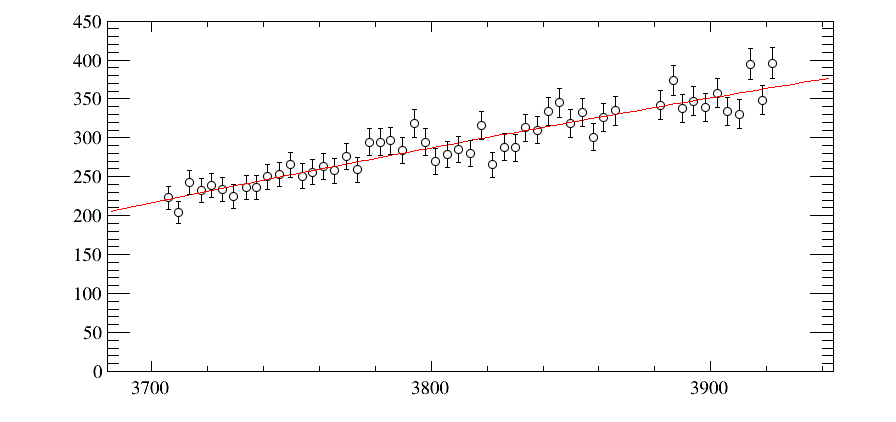

In [4]:
x1=[]; y1=[]
for i in range(len(x)):
    if i not in [41,42,43]:
        x1.append(x[i])
        y1.append(y[i])
gr1 = makeGraph(x1,y1)
gr1.SetMarkerStyle(24)
gr1.GetYaxis().SetRangeUser(0,450)
gr1.Draw("AP")
r = gr1.Fit("pol2","S")
print(r)
canv.Draw()

In [5]:
ROOT.TMath.Prob(44.2873,52)

0.7676164555773278


 Status      = 0 
 Chi2/nDoF   = 44.60499635916464/51 
 Probability = 0.7240790745371041  
 ( 51.8466 +- 15.1167 )  
 ( 3874 +- 0 )  
 ( 3.82979 +- 0 )  
 ( -1018.46 +- 31.9164 )  
 ( 0.0251874 +- 0.00889398 )  
 ( 8.36579e-05 +- 2.20541e-06 ) 
 FCN=44.605 FROM HESSE     STATUS=NOT POSDEF     23 CALLS         115 TOTAL
                     EDM=2.62431e-06    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.18466e+01   1.51167e+01   9.68348e-03  -3.66884e-12
   2  p1           3.87400e+03     fixed    
   3  p2           3.82979e+00     fixed    
   4  p3          -1.01846e+03   3.19164e+01   1.51478e-03   2.25909e-05
   5  p4           2.51874e-02   8.89398e-03   3.98134e-07  -1.71756e-01
   6  p5           8.36579e-05   2.20541e-06   1.04584e-10   3.26734e+02


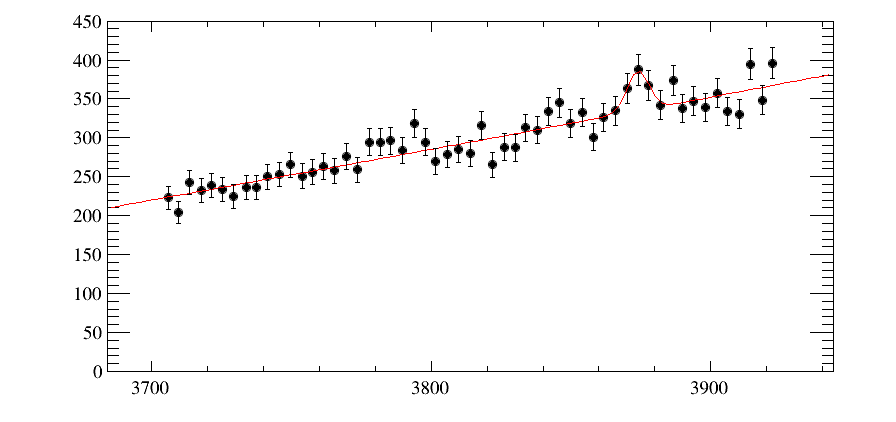

In [6]:
tf1 = ROOT.TF1("tf1","gaus(0)+pol2(3)",3700,4000)
tf1.FixParameter(1,3874)
tf1.FixParameter(2,9./2.35)
rg = gr.Fit(tf1,"S")
print(rg)
gr.Draw("AP")
canv.Draw()

In [7]:
51.84/15.12

3.428571428571429

In [8]:
137./37.

3.7027027027027026

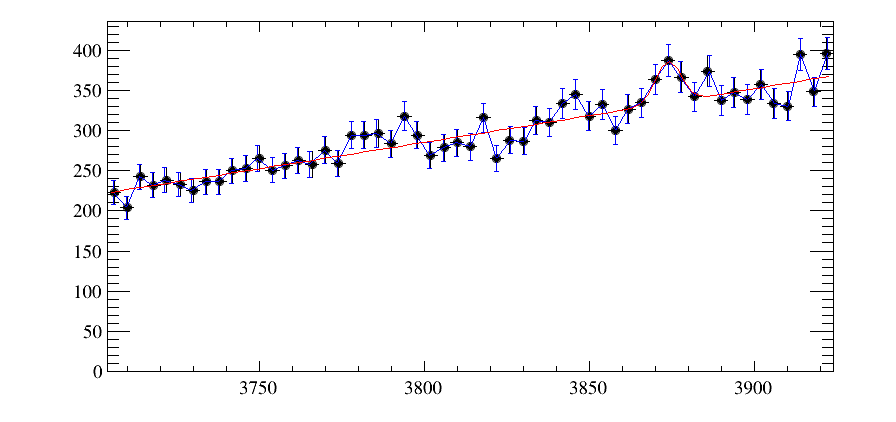

In [9]:
bins = []
for i in range(56):
    bins.append(3704.+i*4.)
h = h1_axis(bins)
for i in range(len(y)):
    h[i+1]=y[i]
h.Draw()
gr.SetLineColor(4)
gr.Draw("same")
h.SetMinimum(0)
canv.Draw()

# 2023-08-16 14:08:20 Gauss_pdf                      WARNING The name "sig_ga" for PDF/FUN already defined!
# 2023-08-16 14:08:20 PolyPos_pdf                    WARNING The name "bkg0" for PDF/FUN already defined!


-54429.97793093305
0.8699420841714517
44.367046292744035
3.2319688057699825
+Result of fit of p.d.f. fit1d_Fitsig_ga_iGySRu to dataset bhds_1000---+----------------------------+
|                               | Unit    | Value                      | Global/max correlation [%] |
+-------------------------------+---------+----------------------------+----------------------------+
| Status                        |         |  0/success                 |                            |
| Minimized FCN/NLL value       | [10^+3] |   -54.42998                |                            |
| Estimated distance to minimum | [10^-6] |   +3.169040                |                            |
| Covariance matrix quality     |         |    3/full accurate matrix  |                            |
| Status: MINIMIZE              |         |    0                       |                            |
| Status: HESSE                 |         |    0                       |                            |
| Stat

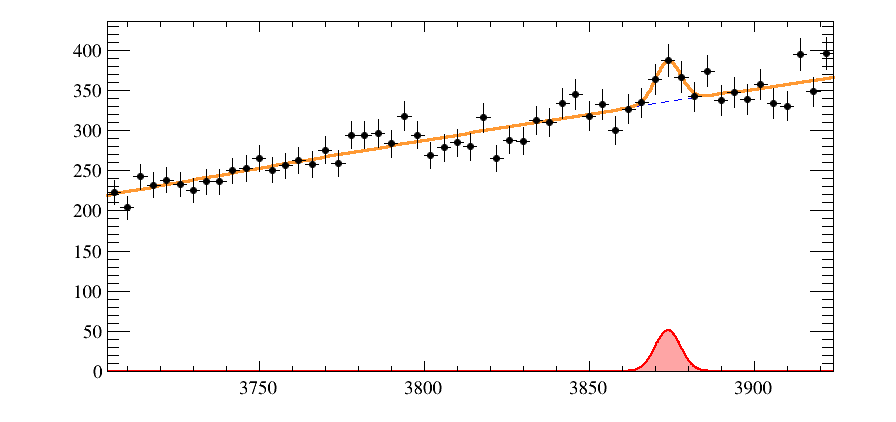

In [45]:
im = ROOT.RooRealVar ('im'   , 'im'    ,  3700. , 4000. )
pk = ROOT.RooRealVar ('pk'   , 'peak'  , 3874.)
sg = ROOT.RooRealVar ('sg'   , 'sigma' ,  9./2.35)
#-------------------------------------------------------------------------------
sig_ga = Models.Gauss_pdf( 'sig_ga', xvar=im,   mean=pk, sigma=sg )
bkg0 = Models.PolyPos_pdf ( 'bkg0' , xvar = im , power = 2 )
#-------------------------------------------------------------------------------
model= Models.Fit1D   ( signal = sig_ga , background = bkg0 )
#-------------------------------------------------------------------------------
ro,wo = model.fitHisto(h, draw=True,silent=True,sumw2=True)
ro,wo = model.fitHisto(h, draw=True,silent=True,sumw2=True)
ro,wo = model.fitHisto(h, draw=True,silent=True,sumw2=True)
print(ro.minNll())
print(wo.chiSquare(4))
print(wo.chiSquare(4)*(55-4))
print(122.4231/37.8788 )
print(ro)
wo.Draw()
canv.Draw()

88187.34153547866
1.0474179921168818
55.51315358219473
+Result of fit of p.d.f. pol_ySrdCo to dataset bhds_1000---------------+----------------------------+
|                               | Unit    | Value                      | Global/max correlation [%] |
+-------------------------------+---------+----------------------------+----------------------------+
| Status                        |         |  0/success                 |                            |
| Minimized FCN/NLL value       | [10^+3] |   +88.18734                |                            |
| Estimated distance to minimum | [10^-6] |   +20.25591                |                            |
| Covariance matrix quality     |         |    3/full accurate matrix  |                            |
| Status: MINIMIZE              |         |    0                       |                            |
| Status: HESSE                 |         |    0                       |                            |
| Status: HESSE            

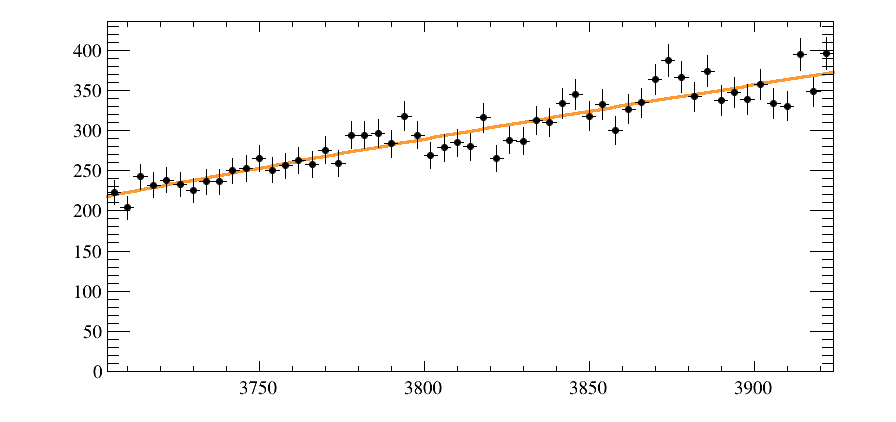

In [44]:
rn,wn = bkg0.fitHisto(h, draw=True,silent=True,sumw2=True)
print(rn.minNll())
print(wn.chiSquare(2))
print(wn.chiSquare(2)*(55-2))
print(rn)
wn.Draw()
canv.Draw()

In [48]:
rn,wn = bkg0.fitTo(h, draw=True,silent=True,sumw2=True) 

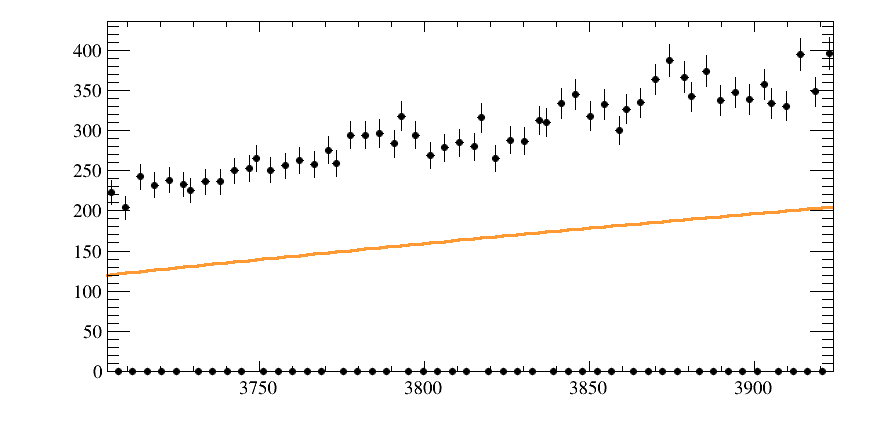

In [49]:
wn.Draw()
canv.Draw()

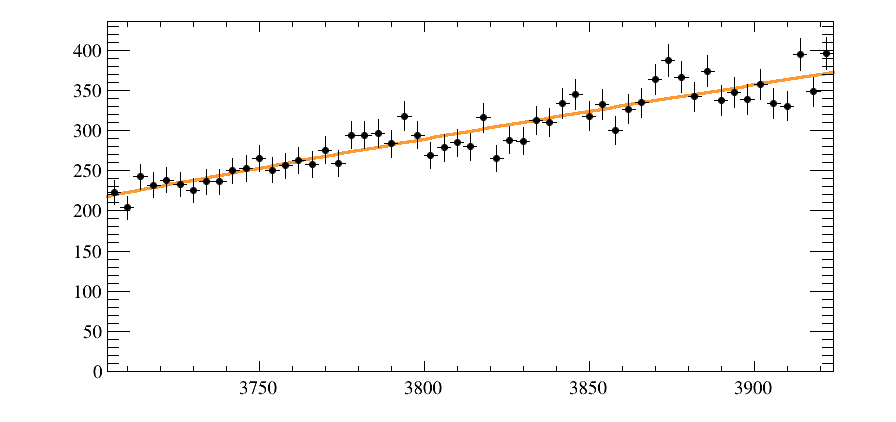

In [50]:
rn,wn = bkg0.fitTo(h, draw=True,silent=True,sumw2=True,nbins=55)
wn.Draw()
canv.Draw()

In [51]:
help(bkg0)

Help on PolyPos_pdf in module ostap.fitting.background object:

class PolyPos_pdf(PolyBase)
 |  PolyPos_pdf(name, xvar, power=1, xmin=None, xmax=None, the_phis=None)
 |  
 |  Positive (Bernstein) polynomial: 
 |  
 |  f(x) = Pol_n(x)
 |  with Pol_n(x)>= 0 over the whole range 
 |  
 |  >>>  mass = ROOT.RooRealVar( ... )
 |  >>>  bkg  = PolyPos_pdf ( 'B' , mass , power = 2 )
 |  
 |  Method resolution order:
 |      PolyPos_pdf
 |      PolyBase
 |      ostap.fitting.pdfbasic.PDF1
 |      ostap.fitting.pdfbasic.APDF1
 |      ostap.fitting.funbasic.FUN1
 |      ostap.fitting.funbasic.AFUN1
 |      ostap.fitting.fithelpers.XVar
 |      ostap.fitting.fithelpers.FitHelper
 |      ostap.fitting.fithelpers.VarMaker
 |      ostap.fitting.fithelpers.ConfigReducer
 |      ostap.fitting.funbasic.F1AUX
 |      ostap.fitting.fithelpers.Phases
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, xvar, power=1, xmin=None, xmax=None, the_phis=None)
 |      Initialize sel

In [52]:
dir(bkg0)

['_AFUN1__checked_keys',
 '_AFUN1__derived',
 '_AFUN1__draw_options',
 '_AFUN1__draw_var',
 '_AFUN1__fun',
 '_AFUN1__func_init',
 '_AFUN1__tricks',
 '_AFUN1__variables',
 '_AFUN1__vars',
 '_APDF1__alist1',
 '_APDF1__alist2',
 '_APDF1__backgrounds',
 '_APDF1__combined_backgrounds',
 '_APDF1__combined_components',
 '_APDF1__combined_signals',
 '_APDF1__components',
 '_APDF1__crossterms1',
 '_APDF1__crossterms2',
 '_APDF1__fit_options',
 '_APDF1__fit_result',
 '_APDF1__histo_data',
 '_APDF1__signals',
 '_APDF1__splots',
 '_ConfigReducer__config',
 '_FUN1__call_OK',
 '_FUN1__constant',
 '_PDF1__call_OK',
 '_Phases__phi_list',
 '_Phases__phis',
 '_PolyPos_pdf__power',
 '_VarMaker__aux_keep',
 '_VarMaker__local_names',
 '_VarMaker__loggers',
 '_VarMaker__name',
 '_VarMaker__numnames',
 '_VarMaker__pdf_names',
 '_VarMaker__var_names',
 '_XVar__xvar',
 '__abs__',
 '__add__',
 '__atan2__',
 '__atan__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__cos__',
 '__cosh__',
 '__del__',

In [53]:
ds = bkg0.histo_data


In [55]:
rr,ww = model.fitTo ( ds , sumw2 = True , nbins = 55, draw = True) 
ww.Draw()
canv.Draw()

# 2023-08-16 14:20:16 Fit1D(Fitsig_ga_iGySRu)        INFO    fitTo options: [Save(True), SumW2Error(True), NumCPU(8,0)] 


TypeError: none of the 2 overloaded methods succeeded. Full details:
  RooFitResult* RooAbsPdf::fitTo(RooAbsData& data, const RooCmdArg& arg1 = RooCmdArg::none(), const RooCmdArg& arg2 = RooCmdArg::none(), const RooCmdArg& arg3 = RooCmdArg::none(), const RooCmdArg& arg4 = RooCmdArg::none(), const RooCmdArg& arg5 = RooCmdArg::none(), const RooCmdArg& arg6 = RooCmdArg::none(), const RooCmdArg& arg7 = RooCmdArg::none(), const RooCmdArg& arg8 = RooCmdArg::none()) =>
    SegmentationViolation: segfault in C++; program state was reset
  RooFitResult* RooAbsPdf::fitTo(RooAbsData& data, const RooLinkedList& cmdList) =>
    TypeError: takes at most 2 arguments (4 given)

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#0] ERROR:InputArguments -- RooAbsOptTestStatistic: ERROR minimum of FUNC observable im(3700) is smaller than that of im in the dataset (3704)


 *** Break *** segmentation violation
 Generating stack trace...
 0x00007f8323f2b476 in raise + 0x16 from /lib/x86_64-linux-gnu/libc.so.6
 0x00007f82da0e012b in RooAbsOptTestStatistic::RooAbsOptTestStatistic(char const*, char const*, RooAbsReal&, RooAbsData&, RooArgSet const&, RooAbsTestStatistic::Configuration const&) + 0x10b from /home/adzyuba/miniconda3/envs/ostap/lib/libRooFitCore.so.6.26.10
 0x00007f82da27820e in RooNLLVar::RooNLLVar(char const*, char const*, RooAbsPdf&, RooAbsData&, RooArgSet const&, bool, RooAbsTestStatistic::Configuration const&) + 0x3e from /home/adzyuba/miniconda3/envs/ostap/lib/libRooFitCore.so.6.26.10
 0x00007f82da278736 in RooNLLVar::create(char const*, char const*, RooAbsReal&, RooAbsData&, RooArgSet const&, RooAbsTestStatistic::Configuration const&) + 0x86 from /home/adzyuba/miniconda3/envs/ostap/lib/libRooFitCore.so.6.26.10
 0x00007f82da12c06d in RooAbsTestStatistic::initMPMode(RooAbsReal*, RooAbsData*, RooArgSet const*, std::__cxx11::basic_string<char,